In [1]:
pip install numpy networkx matplotlib pandas


   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 7.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


C:\Users\AKDEMNB\AppData\Local\Temp\ipykernel_22792\357194692.py:33: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataset = pd.read_csv('C:\\Users\\AKDEMNB\\Downloads\\worms\\worms_2d.txt', delim_whitespace=True, header=None).values


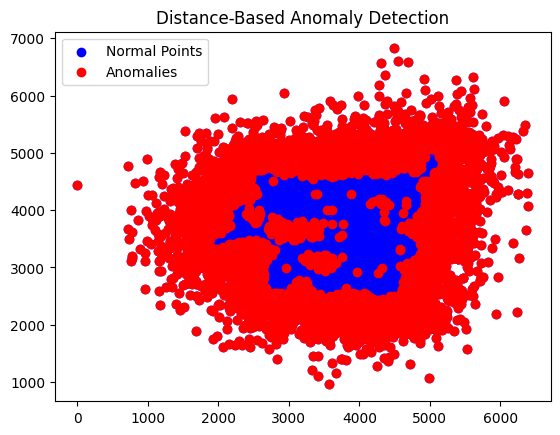

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def knn_with_anomaly_scores(dataset, k):
    knn = nx.Graph()
    score_of_anomalies = []
    small_value = 1e-4  # Small constant to avoid division by zero
    i = 0
    while i < len(dataset):
        knn.add_node(i)
        distances = np.sqrt(np.sum((dataset - dataset[i])**2, axis=1))

         #Finding the smallest k element indices.
        smallest_indices = np.argpartition(distances, k + 1)[:k + 1]
        smallest_indices = smallest_indices[smallest_indices != i]

        avgerage_distance = np.mean(distances[smallest_indices])
        score_of_anomalies.append(avgerage_distance)

        j = 0
        while j < len(smallest_indices):
            v = smallest_indices[j] # v is vertex
            knn.add_edge(i, v, weight=1 / (distances[v] + small_value))
            j = j + 1

        i = i + 1

    return knn, np.array(score_of_anomalies)

# Loading dataset 
dataset = pd.read_csv('C:\\Users\\AKDEMNB\\Downloads\\worms\\worms_2d.txt', delim_whitespace=True, header=None).values

#  KNN and calculate anomaly scores
knn, score_of_anomalies = knn_with_anomaly_scores(dataset, 3)

# Threshold to detect anomalies
threshold = np.percentile(score_of_anomalies, 95)
anomalies = list(filter(lambda i: score_of_anomalies[i] > threshold, range(len(score_of_anomalies))))


plt.scatter(dataset[:, 0], dataset[:, 1], label="Normal Points", color="b")
plt.scatter(dataset[anomalies][:, 0], dataset[anomalies][:, 1], label="Anomalies", color="r")
plt.legend()
plt.title("Distance-Based Anomaly Detection")
plt.show()
